# Line Chat Bot Record Expenses
##### Mr.Jakkrit Sonsanit

***

### Import Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from firebase import firebase

### Create New DataFrame

In [2]:
# dfe = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
#     'cate':[]
# })

## EXPENSES
***

### Load Dataframe

In [3]:
dfe = pd.read_csv('Expenses.csv')
dfe.tail()

,date,text,money,cate
146,2019-10-27,ซักผ้า,30.0,Food
147,2019-10-27,ลูกชิ้นปลา,20.0,Food
148,2019-10-28,นม,16.0,Food
149,2019-10-28,ขนมปัง,12.0,Food
150,2019-10-28,ข้าวเย็น,50.0,Food


### Connect Firebase

In [4]:
authentication = firebase.FirebaseAuthentication('wI4pPnsc1m2Ei7E3Q3drORPWtDBo927IxwBsA6ZH', 'palm8ikaa2@gmail.com', extra={'id': 123})
firebase = firebase.FirebaseApplication('https://line-bot-chrins.firebaseio.com/', authentication=authentication)

### Query Expenses from firebase

In [5]:
result = firebase.get('/expenses', None)

### Append new expenses in dataframe

In [6]:
tmp = list()
old_numlist = len(dfe)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        dfe = dfe.append(tmp[i], ignore_index=True)
dfe.date = pd.to_datetime(dfe.date)
dfe.tail()

,date,text,money,cate
154,2019-10-29,ข้าวเย็น,40.0,NaN
155,2019-10-29,ซาลาเปา,20.0,NaN
156,2019-10-30,ข้าวเที่ยง,40.0,NaN
157,2019-10-30,ข้าวเย็น,200.0,NaN
158,2019-10-30,น้ำ,14.0,NaN


### Append expenses on day in dataframe

In [7]:
# for k, v in result.items():
#     if v['date'] == '6/9/2019':
#         dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Append all expenses to dataframe

In [8]:
# for k, v in result.items():
#     dfe = dfe.append(v, ignore_index=True)
# dfe.date = pd.to_datetime(dfe.date)
# dfe.head()

### Set NaN Category is Food

In [9]:
dfe.cate = dfe.cate.fillna('Food')
dfe.tail(10)

,date,text,money,cate
149,2019-10-28,ขนมปัง,12.0,Food
150,2019-10-28,ข้าวเย็น,50.0,Food
151,2019-10-29,นม,10.0,Food
152,2019-10-29,ข้าวเที่ยง,25.0,Food
153,2019-10-29,น้ำกระเจี๊ยบ,5.0,Food
154,2019-10-29,ข้าวเย็น,40.0,Food
155,2019-10-29,ซาลาเปา,20.0,Food
156,2019-10-30,ข้าวเที่ยง,40.0,Food
157,2019-10-30,ข้าวเย็น,200.0,Food
158,2019-10-30,น้ำ,14.0,Food


### Change category

In [10]:
t = ['Entertainment', 'Transportation', 'Shopping', 'Food', 'Bill', 'Other']
n = 140
dfe.at[n, 'cate'] = t[2]
dfe.iloc[n:]

,date,text,money,cate
140,2019-10-26,ซื้อตุ้มหู,150.0,Shopping
141,2019-10-26,มาม่า,8.0,Food
142,2019-10-26,ไข่ลวก,16.0,Food
143,2019-10-26,ทูน่า,44.0,Food
144,2019-10-27,ข้าวหอมมะลิ,65.0,Food
145,2019-10-27,นม,16.0,Food
146,2019-10-27,ซักผ้า,30.0,Food
147,2019-10-27,ลูกชิ้นปลา,20.0,Food
148,2019-10-28,นม,16.0,Food
149,2019-10-28,ขนมปัง,12.0,Food


### Save to csv

In [10]:
dfe.to_csv('Expenses.csv', index=False)

## INCOME
***

### Create DataFrame

In [11]:
# dfi = pd.DataFrame({
#     'date':[],
#     'text':[],
#     'money':[],
# })

### Load DataFrame

In [12]:
dfi = pd.read_csv('income.csv')

### Query income from firebase

In [13]:
result = firebase.get('/income', None)

### Append new income 

In [14]:
tmp = list()
old_numlist = len(dfi)
for k, v in result.items():
    tmp.append(v)
for i in range(len(tmp)):
    if i >= old_numlist:
        dfi = dfi.append(tmp[i], ignore_index=True)
dfi.date = pd.to_datetime(dfi.date)
dfi.tail()

,date,text,money
0,2019-10-01,พ่อให้,14000.0
1,2019-10-17,ได้เงิน,625.0
2,2019-10-18,ได้เงิน,155.0


### Save to csv

In [15]:
dfi.to_csv('income.csv', index=False)

## Summary 
***

### Balance

In [16]:
print("Balance : %.2f Bath" %(sum(dfi.money)-sum(dfe.money)))

Balance : -10.77 Bath


### Total Incom and Expenses 

In [18]:
print("Total Income :", sum(dfi.money), 'Bath')
print("Total Expenses :", sum(dfe.money), 'Baht')

Total Income : 14780.0 Bath
Total Expenses : 14436.77 Baht


### Total Expenses in day

In [19]:
d = "2019-"+input("mm-dd :")
print("Total Expenses in", d, ":", sum(dfe[dfe.date == d]['money']), 'Baht')
dfe[dfe.date == d]

mm-dd :
Total Expenses in 2019- : 0 Baht


,date,text,money,cate


### Total Expenses in each month 

In [20]:
tmp = dfe.rename(columns={"date": "Month", "money":"Money"})
tmp.groupby(tmp.Month.dt.month).sum()

,Money
Month,
10,14436.77


### Total Expenses in each category

In [17]:
dfe.groupby(['cate']).sum()

,money
cate,
Bill,6457.77
Entertainment,1930.00
Food,4466.00
Other,210.00
Saving,20.00
Shopping,1254.00
Transportation,453.00


### Expenses in each category

In [18]:
ls = ['1.Food', '2.Entertainment', '3.Bill', '4.Saving', '5.Shopping', '6.Transportation', '7.Other']
print(*ls)
dfe[dfe.cate == ls[int(input('Enter number of category '))-1][2:]]

1.Food 2.Entertainment 3.Bill 4.Saving 5.Shopping 6.Transportation 7.Other
Enter number of category 2


,date,text,money,cate
54,2019-10-09,ค่าหนัง,140.0,Entertainment
55,2019-10-10,เติมเกม,300.0,Entertainment
56,2019-10-10,ดูหนัง,100.0,Entertainment
59,2019-10-11,ค่าเหล้า,120.0,Entertainment
81,2019-10-16,ค่าเหล้า,330.0,Entertainment
90,2019-10-18,ค่าเหล้า,260.0,Entertainment
93,2019-10-19,นวด,450.0,Entertainment
99,2019-10-20,ธูปเทียน,20.0,Entertainment
101,2019-10-20,ธูปเทียน,20.0,Entertainment
129,2019-10-25,ซื้อเกม,190.0,Entertainment


### Total in each day

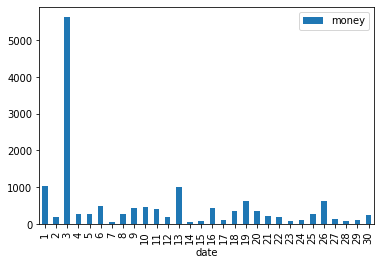

In [19]:
tmp = dfe.groupby(dfe.date.dt.day).sum()
tmp.plot(kind='bar');

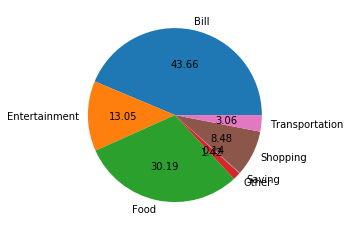

In [20]:
tmp = dfe.groupby(['cate']).sum()
tmp = tmp.reset_index()
plt.pie(tmp.money, labels=tmp.cate, autopct='%2.2f');